In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

In [ ]:
data = files.upload()

Saving glass_identification.csv to glass_identification.csv


In [ ]:
df = pd.read_csv("glass_identification.csv")
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1


In [ ]:
df.describe(include='all')

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057014,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097436,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
df.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df.shape

(214, 11)

In [ ]:
df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df_1 = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']]
df_1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



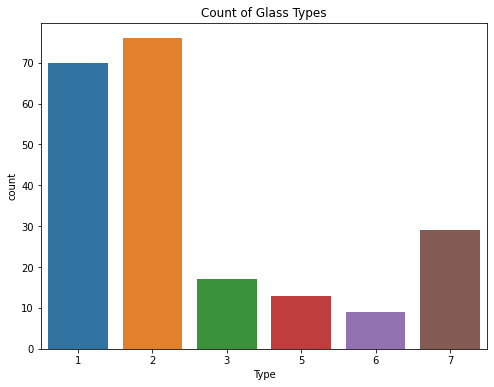

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot('Type',data=df_1).set_title('Count of Glass Types')
plt.show()

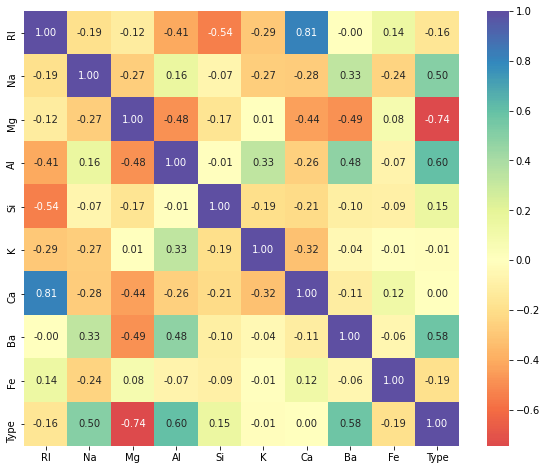

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),fmt='.2f',annot=True,cmap='Spectral',square=True,center=0)
plt.show()

In [ ]:
from sklearn import preprocessing
X = df_1[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
Y = df_1[['Type']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])
print(Y[0:5])

[[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.57622815]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.58651536]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.58651536]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.58651536]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.58651536]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (171, 9) (171, 1)
Test set: (43, 9) (43, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
length = 50
mean_accuracy = []
for i in range(1,length):
  neighbour = KNeighborsClassifier(n_neighbors = i)
  neighbour.fit(X_train,y_train)
  y_hat = neighbour.predict(X_test)
  mean_accuracy.append(metrics.accuracy_score(y_test,y_hat)*100)
print(mean_accuracy)

[83.72093023255815, 83.72093023255815, 83.72093023255815, 81.3953488372093, 81.3953488372093, 74.4186046511628, 72.09302325581395, 74.4186046511628, 76.74418604651163, 79.06976744186046, 76.74418604651163, 79.06976744186046, 76.74418604651163, 72.09302325581395, 72.09302325581395, 74.4186046511628, 72.09302325581395, 74.4186046511628, 76.74418604651163, 76.74418604651163, 76.74418604651163, 76.74418604651163, 74.4186046511628, 69.76744186046511, 76.74418604651163, 72.09302325581395, 69.76744186046511, 69.76744186046511, 67.44186046511628, 67.44186046511628, 67.44186046511628, 67.44186046511628, 72.09302325581395, 72.09302325581395, 72.09302325581395, 72.09302325581395, 72.09302325581395, 69.76744186046511, 72.09302325581395, 67.44186046511628, 72.09302325581395, 69.76744186046511, 67.44186046511628, 67.44186046511628, 67.44186046511628, 67.44186046511628, 65.11627906976744, 65.11627906976744, 62.7906976744186]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was pa

In [ ]:
fig = px.line(x=range(1,length),y=mean_accuracy,labels={'x':'K Values','y':'Accuracy Score'})
fig.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
knn.fit(X_train,y_train)
y_hat_pred = knn.predict(X_test)
y_hat_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 7, 2, 1, 2, 1, 5, 1, 2, 2, 5, 1, 1, 6, 1, 1, 2, 7, 7, 1, 1, 2,
       7, 2, 6, 2, 1, 1, 7, 2, 1, 7, 1, 1, 2, 2, 1, 1, 2, 2, 5, 7, 2])

[[14  0  0  0  0]
 [ 3 13  1  0  0]
 [ 0  0  2  0  1]
 [ 0  0  0  2  0]
 [ 0  1  0  0  6]]
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       0.93      0.76      0.84        17
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       0.86      0.86      0.86         7

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43



<Figure size 720x576 with 0 Axes>

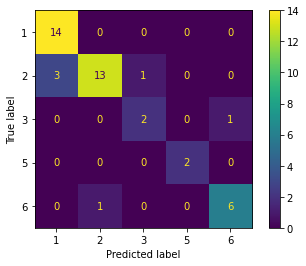

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print(confusion_matrix(y_test,y_hat_pred))
print(classification_report(y_test,y_hat_pred))
plt.figure(figsize=(10,8))
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


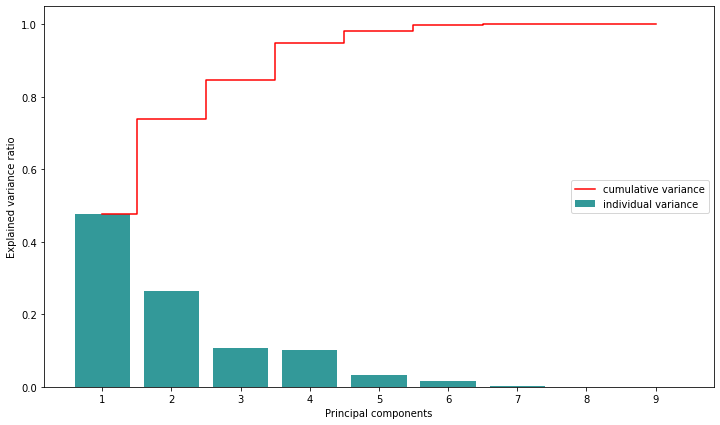

In [ ]:
from sklearn.decomposition import PCA
X_var = df_1[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

<function matplotlib.pyplot.show>

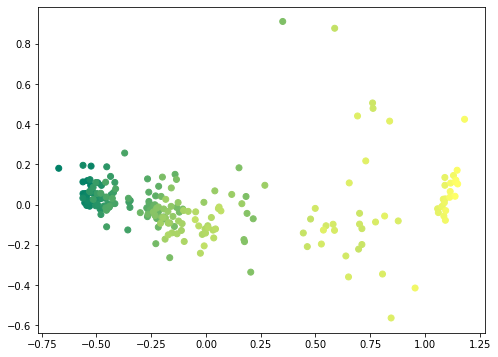

In [ ]:
from sklearn import datasets
dataset = pd.read_csv('glass_identification.csv')
dataset.head()
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset)
scaled_data=scaler.transform(dataset)
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,-1],c=dataset['ID'],cmap='summer')
plt.show

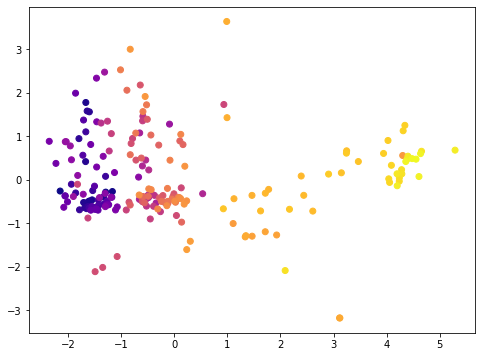

Covariance Matrix  [[ 1.00469484e+00 -1.92786249e-01 -1.22848096e-01 -4.09238363e-01
  -5.44597046e-01 -2.91193428e-01  8.14207404e-01 -3.87831208e-04
   1.43727188e-01 -1.65008281e-01]
 [-1.92786249e-01  1.00469484e+00 -2.75017087e-01  1.57529788e-01
  -7.01365474e-02 -2.67335737e-01 -2.76735643e-01  3.28136226e-01
  -2.42472507e-01  5.05259066e-01]
 [-1.22848096e-01 -2.75017087e-01  1.00469484e+00 -4.84060474e-01
  -1.66705721e-01  5.42099905e-03 -4.45833360e-01 -4.94573208e-01
   8.35124068e-02 -7.48490507e-01]
 [-4.09238363e-01  1.57529788e-01 -4.84060474e-01  1.00469484e+00
  -5.54965338e-03  3.27488767e-01 -2.60810752e-01  4.81654624e-01
  -7.47869884e-02  6.01640613e-01]
 [-5.44597046e-01 -7.01365474e-02 -1.66705721e-01 -5.54965338e-03
   1.00469484e+00 -1.94238511e-01 -2.09712117e-01 -1.02630894e-01
  -9.47000667e-02  1.52276832e-01]
 [-2.91193428e-01 -2.67335737e-01  5.42099905e-03  3.27488767e-01
  -1.94238511e-01  1.00469484e+00 -3.19328343e-01 -4.28181441e-02
  -7.78794673e

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
"""## Importing the dataset"""
dataset = pd.read_csv('glass_identification.csv')
dataset.head()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dataset)
scaled_data=scaler.transform(dataset)
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,-1],c=dataset['ID'],cmap='plasma')
plt.show()

dataset.drop(['ID'],axis = 1,inplace = True)
x_std = StandardScaler().fit_transform(dataset)
mean_vec = np.mean(x_std, axis = 0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
print('Covariance Matrix ', cov_mat)

cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen Vectors ',eig_vecs)
print('Eigen Values ',eig_vals)
sup = 0
for i in range(0,10):
    for j in range(0,10):
        if i>j:
            sup = sup + cov_mat[i][j]
print('Sum of Upper Triangle of Co-Variance Matrix :',sup)

x_pca = StandardScaler().fit_transform(x_pca)
mean_vec = np.mean(x_pca, axis = 0)
cov_mat = (x_pca - mean_vec).T.dot((x_pca - mean_vec))/(x_pca.shape[0]-1)
print('Covariance Matrix ', cov_mat)

cov_mat = np.cov(x_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen Vectors ',eig_vecs)
print('Eigen Values ',eig_vals)
sup = 0
for i in range(0,2):
    for j in range(0,2):
        if i>j:
            sup = sup + cov_mat[i][j]
print('Sum of Upper Triangle of Co-Variance Matrix :',sup)